## Homework 2

* Import Boston Dataset from sklearn dataset class.
* Explore and analyse raw data.
* Do preprocessing for regression.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
* Evaluate the results of all models and choose the best performing model.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score

## LOAD AND EXPLORE THE DATASET

In [2]:
# load data
Xb,yb =load_boston(return_X_y=True)
x_boston = pd.DataFrame(Xb,columns = load_boston().feature_names)
y_boston = pd.DataFrame(yb)

In [7]:
x_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


As we can see, there are 13 features, all numeric, all non-null. We can explore them a little further with describe

In [3]:
x_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

The variables ranges are quite different, so it will be better to normalize them before training the model. 

Let's first investigate correlation among features

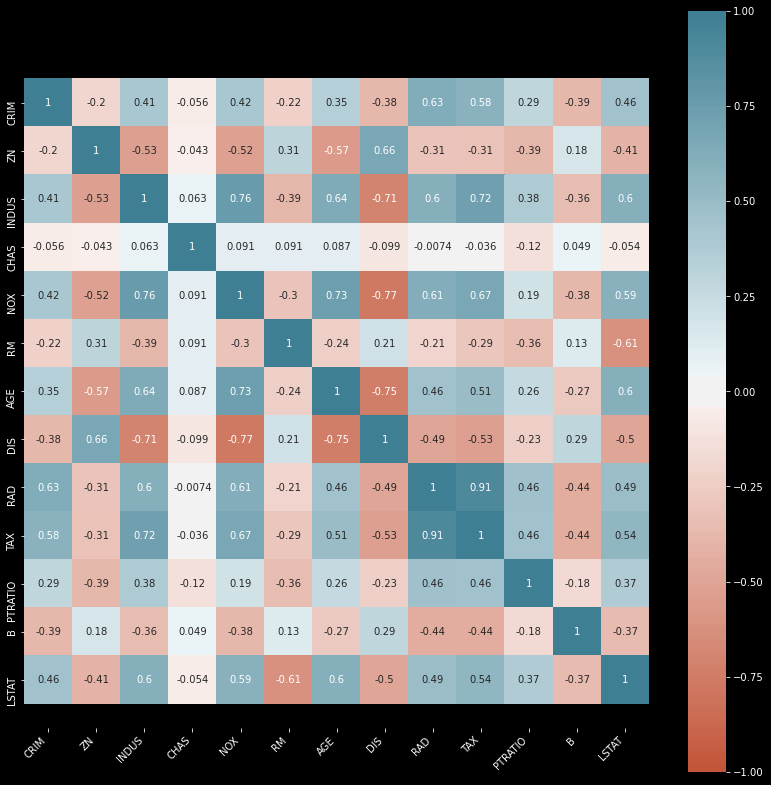

In [4]:
corr = x_boston.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

For all pair of features with correlation larger than 0.7 in absolute terms, I will drop one of them. 

From the table above, candidates to be dropped are the pairs:

* AGE - DIS
* RAD - TAX
* INDUS - NOX
* RM - CHAS
* DIS - INDUS
* AGE - NOX
* DIS - NOX

AGE - DIS - INDUS - NOX  seem to be all correlated and will be investigated together

In [9]:
test1 = pd.concat([x_boston['AGE'],x_boston['DIS'],x_boston['INDUS'],x_boston['NOX'],y_boston],axis=1)

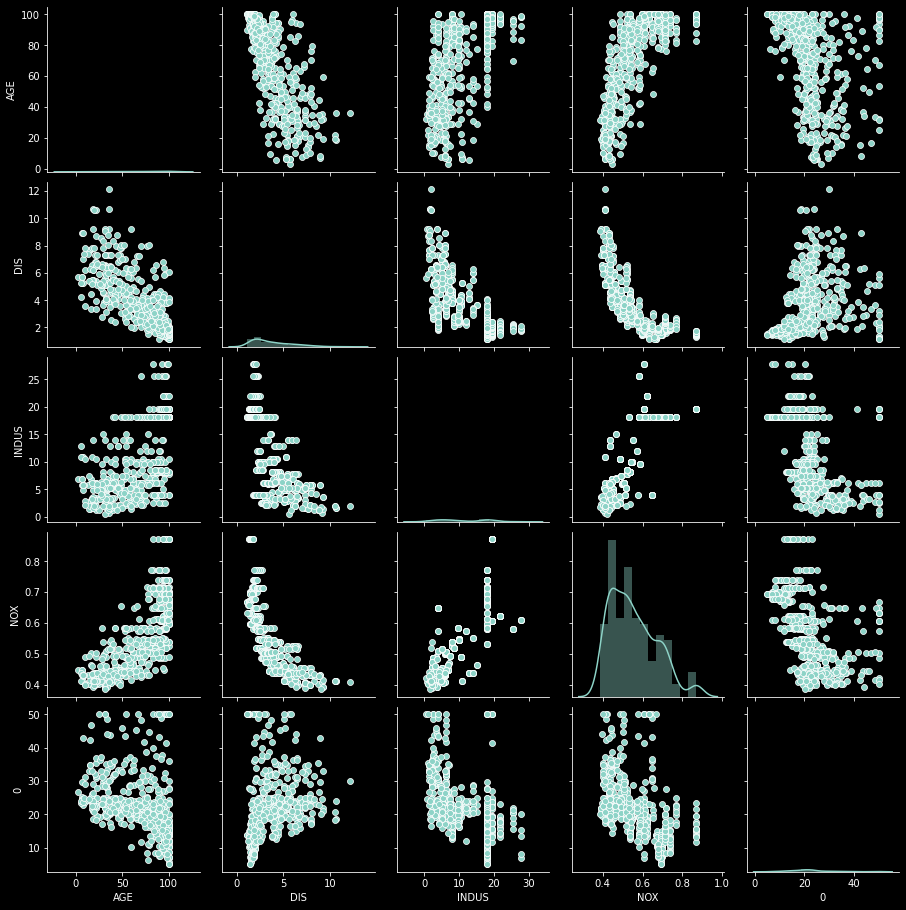

In [8]:
g = sns.PairGrid(test1)
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

Looking at the plot above, it doesn´t seem that any of the variables are very correlated with our label variable (y_boston). If anything DIS seems to be the best one, so I will keep it and drop the rest

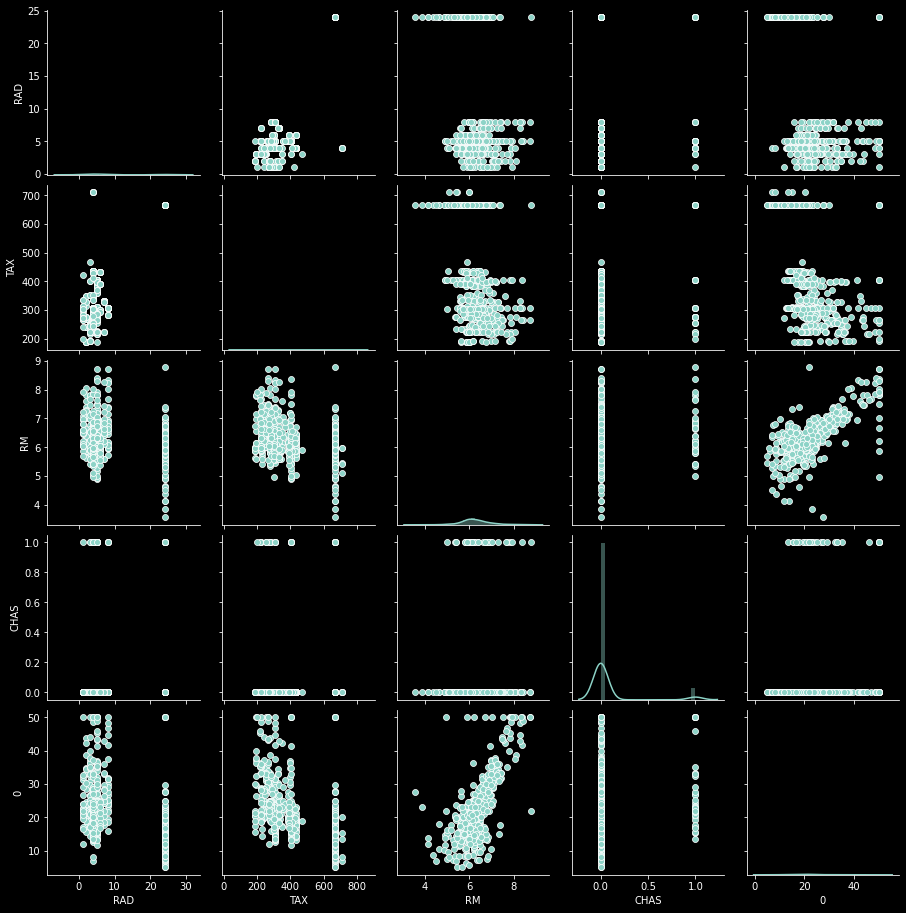

In [10]:
test2 = pd.concat([x_boston['RAD'],x_boston['TAX'],x_boston['RM'],x_boston['CHAS'],y_boston],axis=1)
g = sns.PairGrid(test2)
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

From the graph above, seems that RM is the only feature worth including, so I will drop the rest.

In [11]:
drop_col = ('AGE','INDUS','NOX','RAD','TAX','CHAS')
for col in drop_col:
    x_boston = x_boston.drop(col,axis=1)
x_boston.head()

CRIM    ZN     RM     DIS  PTRATIO       B  LSTAT
0  0.00632  18.0  6.575  4.0900     15.3  396.90   4.98
1  0.02731   0.0  6.421  4.9671     17.8  396.90   9.14
2  0.02729   0.0  7.185  4.9671     17.8  392.83   4.03
3  0.03237   0.0  6.998  6.0622     18.7  394.63   2.94
4  0.06905   0.0  7.147  6.0622     18.7  396.90   5.33

Let's have a look at the dataset at this point

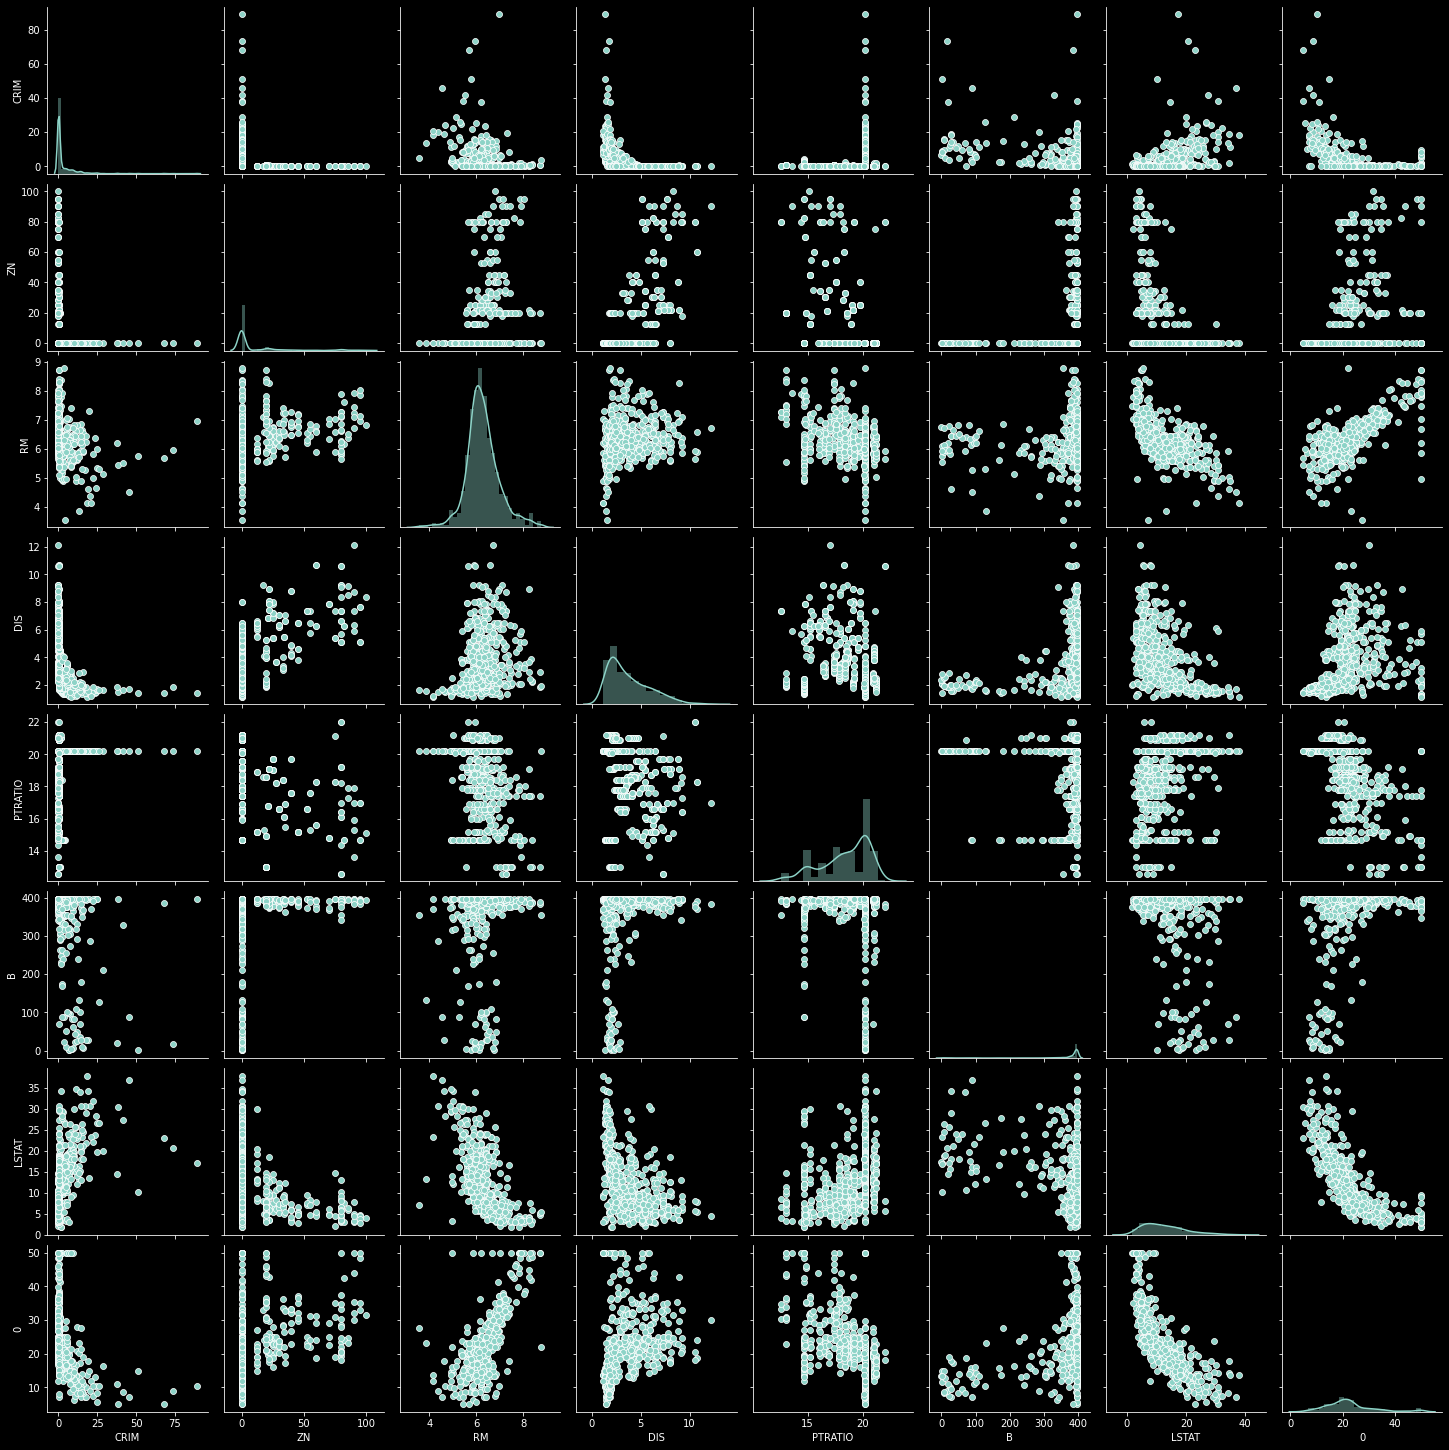

In [12]:
test3 = pd.concat([x_boston,y_boston],axis=1)
g = sns.PairGrid(test3)
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

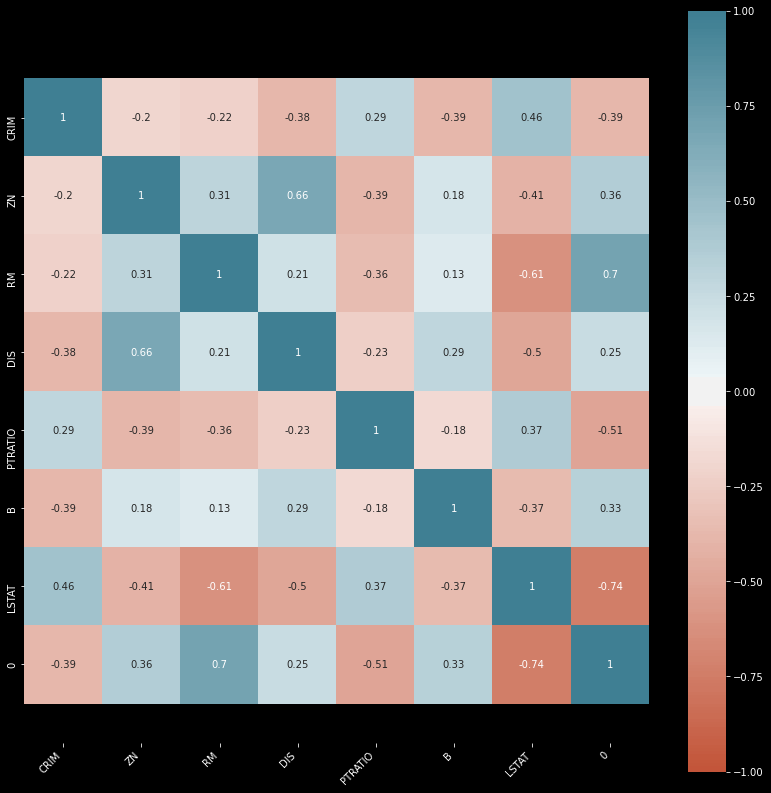

In [14]:
corr = test3.corr()

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

This seems to be an appropriate set of features to begin the modeling process. 

The next step is check for outliers

The next stage is normalization.

In [19]:
# get column names
col_names = list(x_boston)

['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [20]:
# scale features
scaler = preprocessing.StandardScaler().fit(x_boston)
x_scaled = pd.DataFrame(scaler.transform(x_boston),columns = col_names)
x_scaled.head()

CRIM        ZN        RM       DIS   PTRATIO         B     LSTAT
0 -0.419782  0.284830  0.413672  0.140214 -1.459000  0.441052 -1.075562
1 -0.417339 -0.487722  0.194274  0.557160 -0.303094  0.441052 -0.492439
2 -0.417342 -0.487722  1.282714  0.557160 -0.303094  0.396427 -1.208727
3 -0.416750 -0.487722  1.016303  1.077737  0.113032  0.416163 -1.361517
4 -0.412482 -0.487722  1.228577  1.077737  0.113032  0.441052 -1.026501

## REGRESSION MODEL

In [22]:
# split data in train and validation
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_boston,random_state=0,test_size=0.3)

In [23]:
# instanciate and fit the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
# Function to calculate adjusted R-square
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [28]:
# get R-squared and adjusted R-squared
print("R-squared train = ", model.score(x_train,y_train))
print("R-squared test = ", model.score(x_test,y_test))
print("Adj-R-squared train = ", adj_r2(x_train,y_train,model))
print("Adj-R-squared test = ", adj_r2(x_test,y_test,model))

R-squared train =  0.7369138571234695
R-squared test =  0.6367809597322716
Adj-R-squared train =  0.7315913050999558
Adj-R-squared test =  0.6191244786081459


As we can see, there is some degree of overfitting. I will try with ridge and lasso regresions.

## RIDGE REGRESSION

In [63]:
ridge_model = Ridge(alpha = 0.0000001)
ridge_model.fit(x_train, y_train)

Ridge(alpha=1e-07)

In [60]:
print("Ridge Train: ", ridge_model.score(x_train, y_train))
print("Ridge Test: ", ridge_model.score(x_test, y_test))

Ridge Train:  0.7369138571234695
Ridge Test:  0.6367809597186715


## LASSO REGRESSION

In [64]:
lasso_model = Lasso(alpha = 0.0000001)
lasso_model.fit(x_train, y_train)

Lasso(alpha=1e-07)

In [62]:
print("Lasso Train: ", lasso_model.score(x_train, y_train))
print("Lasso Test: ", lasso_model.score(x_test, y_test))

Lasso Train:  0.7369138571234684
Lasso Test:  0.6367809594019974


## HYPERPARAMETER TUNING